In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd 
import matplotlib.path as mplPath

# Getting the Nodes in the Manhattan Network from the Jargo Instance

In [2]:
rnet_file = '/home/keith/Dissertation/github/jargo_datasets/Simonetto/mny.rnet'
edges = pd.read_csv(rnet_file,
                    sep=' ',
                    names=['ID_edge',
                          'from_ID',
                          'to_ID',
                          'from_x',
                          'from_y',
                          'to_x',
                          'to_y'])
nodes_from = edges[['from_ID','from_x','from_y']]
nodes_from.columns = ['id','x','y']
nodes_to = edges[['to_ID','to_x','to_y']]
nodes_to.columns = ['id','x','y']
nodes = pd.concat([nodes_from,nodes_to],ignore_index=True)
nodes=nodes.drop_duplicates(subset=['id','x','y'])
nodes.set_index('id',inplace=True)
nodes = nodes.sort_values('id')
nodes                        

,x,y
id,,
1,-73.978969,40.783390
2,-73.979568,40.783650
3,-73.991688,40.738045
4,-73.991019,40.737764
5,-73.931611,40.800105
...,...,...
12316,-73.986592,40.773109
12317,-73.913304,40.876437
12318,-73.973978,40.746062


## Visualization

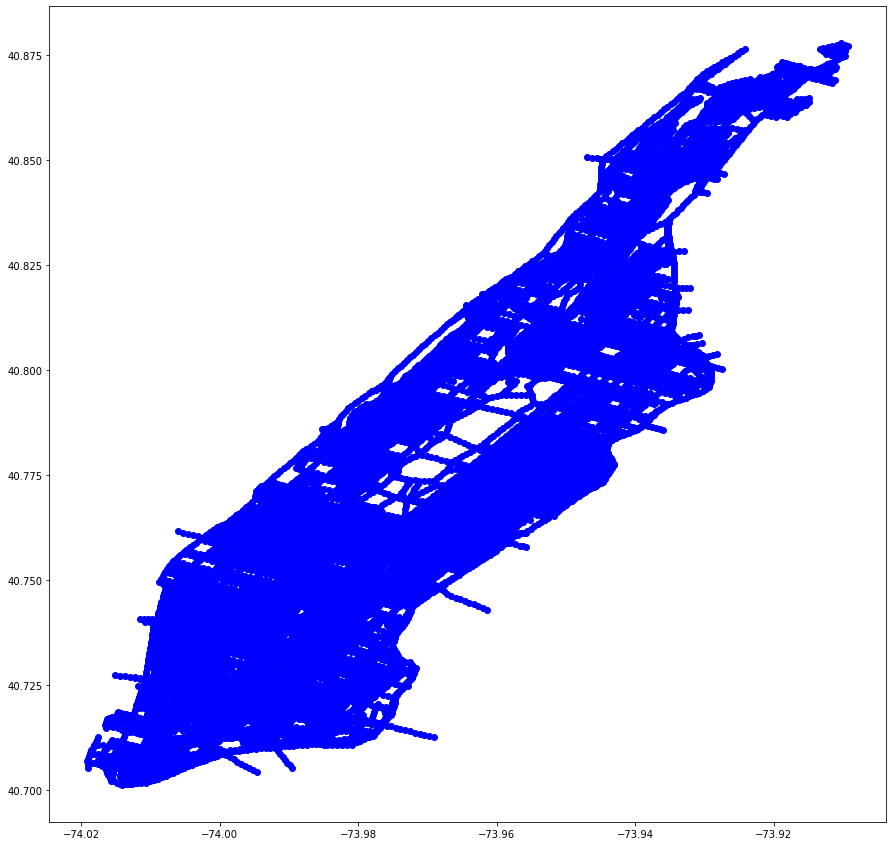

In [3]:
plt.figure(figsize=(15,15))
plt.scatter(nodes['x'],nodes['y'],c='b')
plt.show()

# Getting the Grid for the Demand Model From Liu 2019

Most of this is taken from the grid_split.py file in Liu's implementation

In [4]:
def dd(x, y):
    return y[0] - x[0], y[1] - x[1]
def getPoint(root, up, right, gmap, x, y):
    upx, upy = dd(root, up)
    rgx, rgy = dd(root, right)
    sr = float(x) / float(gmap[0])
    su = float(y) / float(gmap[1])
    return root[0] + upx * su + rgx * sr, root[1] + upy * su + rgy * sr

In [5]:
#original function based on the coordinates used in Liu_2019
def getGridList(grid_map=(5,15)):

    '''
        for New York
    '''
    _upleft=    (-962.97, 817.41)
    _upright=   (-917.64, 798.09) #not used
    _downleft=  (-1041.729755,710.62942) 
    _downright= (-996.4,  691.31)
    pad_longitube = -73
    pad_latitube = 40
    scale_longitube = 1e3
    scale_latitube = 1e3
    grid_map=(5,15)
    #grid_map=(1,1)


    co_map = []
    for i in range(grid_map[1] + 1):
        row = []
        for j in range(grid_map[0] + 1):
            xx, yy = getPoint(_downleft, _upleft, _downright, grid_map, j, i)
            #row.append((xx, yy))
            row.append((xx / scale_longitube + pad_longitube, yy / scale_latitube + pad_latitube))
        co_map.append(row)
    # print(co_map)

    list_index=[]
    list_coordinates=[]
    for i in range(1, grid_map[1] + 1):
        for j in range(1, grid_map[0] + 1):
            coord = [co_map[i-1][j-1], co_map[i][j-1],
                     co_map[i][j], co_map[i-1][j]]
            index = (j-1,i-1)
            list_coordinates.append(coord)
            list_index.append(index)
    # print(grid_dict)
    return list_index, list_coordinates

In [6]:
index, coordinates = getGridList()

In [7]:
print("length of the index variable: ",len(index))
print("example index: ",index[0])
print("length of the coordinates variable: ",len(coordinates))
print("example coordinate: ",coordinates[0])

length of the index variable:  75
example index:  (0, 0)
length of the coordinates variable:  75
example coordinate:  [(-74.041729755, 40.71062942), (-74.03647910466667, 40.71774812533333), (-74.02741315366667, 40.71388424133333), (-74.032663804, 40.706765536)]


## Converting to a dataframe

In [8]:
coordinates[0]

[(-74.041729755, 40.71062942),
 (-74.03647910466667, 40.71774812533333),
 (-74.02741315366667, 40.71388424133333),
 (-74.032663804, 40.706765536)]

In [9]:
[item for t in coordinates[0] for item in t]

[-74.041729755,
 40.71062942,
 -74.03647910466667,
 40.71774812533333,
 -74.02741315366667,
 40.71388424133333,
 -74.032663804,
 40.706765536]

In [10]:
coordinates_unpacked = [ [item for t in c for item in t] for c in coordinates ]
coord_df = pd.DataFrame(coordinates_unpacked, columns=['x1','y1','x2','y2','x3','y3','x4','y4'])
coord_df

,x1,y1,x2,y2,x3,y3,x4,y4
0,-74.041730,40.710629,-74.036479,40.717748,-74.027413,40.713884,-74.032664,40.706766
1,-74.032664,40.706766,-74.027413,40.713884,-74.018347,40.710020,-74.023598,40.702902
2,-74.023598,40.702902,-74.018347,40.710020,-74.009281,40.706156,-74.014532,40.699038
3,-74.014532,40.699038,-74.009281,40.706156,-74.000215,40.702293,-74.005466,40.695174
4,-74.005466,40.695174,-74.000215,40.702293,-73.991149,40.698429,-73.996400,40.691310
...,...,...,...,...,...,...,...,...
70,-73.968221,40.810291,-73.962970,40.817410,-73.953904,40.813546,-73.959155,40.806427
71,-73.959155,40.806427,-73.953904,40.813546,-73.944838,40.809682,-73.950089,40.802564
72,-73.950089,40.802564,-73.944838,40.809682,-73.935772,40.805818,-73.941023,40.798700
73,-73.941023,40.798700,-73.935772,40.805818,-73.926706,40.801954,-73.931957,40.794836


## Visualization

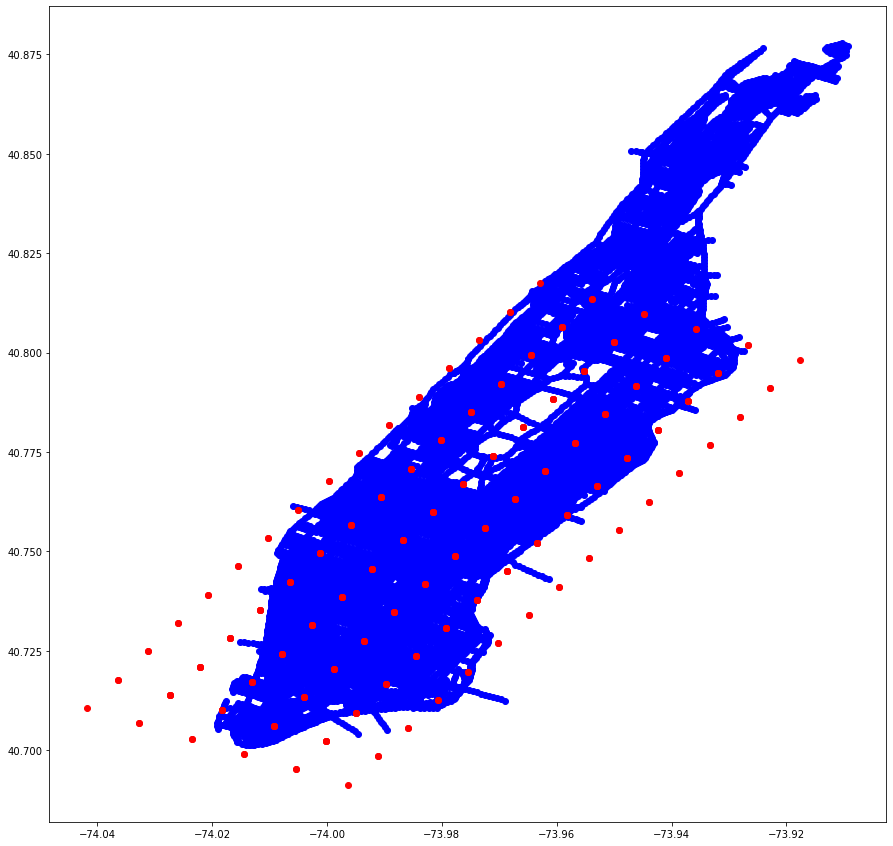

In [11]:
plt.figure(figsize=(15,15))
plt.scatter(nodes['x'],nodes['y'],c='b')
plt.scatter(coord_df['x1'],coord_df['y1'],c='r')
plt.scatter(coord_df['x2'],coord_df['y2'],c='r')
plt.scatter(coord_df['x3'],coord_df['y3'],c='r')
plt.scatter(coord_df['x4'],coord_df['y4'],c='r')
plt.show()

# Mapping Jargo Instance nodes to Demand Model Region

In [12]:
# a function which takes a point (x,y)
# and returns the index of the grid space in which it belongs

# to check if a point is inside one of the grid spaces, we generate 4 triangles, connecting the 
# point to each of the sides of the grid space, and then check if the total area of these 4
# triangles is equal to the area of the grid space
# refer to https://math.stackexchange.com/questions/190111/how-to-check-if-a-point-is-inside-a-rectangle/190403#190403

#these only refer to relationships between the grid spaces themselves,
#so we compute them once and reuse them
coord_df['a1'] = np.sqrt( (coord_df['x1']-coord_df['x2'])**2 + (coord_df['y1']-coord_df['y2'])**2 )
coord_df['a2'] = np.sqrt( (coord_df['x2']-coord_df['x3'])**2 + (coord_df['y2']-coord_df['y3'])**2 )
coord_df['a3'] = np.sqrt( (coord_df['x3']-coord_df['x4'])**2 + (coord_df['y3']-coord_df['y4'])**2 )
coord_df['a4'] = np.sqrt( (coord_df['x4']-coord_df['x1'])**2 + (coord_df['y4']-coord_df['y1'])**2 )
coord_df['A_true'] = coord_df['a1'] * coord_df['a2']

In [13]:
def locateInGrid(lon,lat,grid_df):
    #we don't want to modify the original grid while making calculations
    g = grid_df.copy()

    #computing the sides of the triangles
    g['b1'] = np.sqrt( (g['x1']-lon)**2 + (g['y1']-lat)**2 )
    g['b2'] = np.sqrt( (g['x2']-lon)**2 + (g['y2']-lat)**2 )
    g['b3'] = np.sqrt( (g['x3']-lon)**2 + (g['y3']-lat)**2 )
    g['b4'] = np.sqrt( (g['x4']-lon)**2 + (g['y4']-lat)**2 )
    
    #computing the areas of the triangles
    g['u1'] = (g['a1'] + g['b1'] + g['b2']) / 2
    g['u2'] = (g['a2'] + g['b2'] + g['b3']) / 2
    g['u3'] = (g['a3'] + g['b3'] + g['b4']) / 2
    g['u4'] = (g['a4'] + g['b4'] + g['b1']) / 2
    g['A1'] = np.sqrt( g['u1'] * (g['u1']-g['a1']) * (g['u1']-g['b1']) * (g['u1']-g['b2']) )
    g['A2'] = np.sqrt( g['u2'] * (g['u2']-g['a2']) * (g['u2']-g['b2']) * (g['u2']-g['b3']) )
    g['A3'] = np.sqrt( g['u3'] * (g['u3']-g['a3']) * (g['u3']-g['b3']) * (g['u3']-g['b4']) )
    g['A4'] = np.sqrt( g['u4'] * (g['u4']-g['a4']) * (g['u4']-g['b4']) * (g['u4']-g['b1']) )
    
    #the total area of the 4 triangles
    g['A_total'] = g['A1'] + g['A2'] + g['A3'] + g['A4']
    
    #the difference between the two areas
    g['A_diff'] = g['A_total'] - g['A_true']

    # In theory, the check should work as follows:
    #   -> if A_total is greater than A_true (i.e. A_diff > 0), the point lies outside the rectangle
    #   -> if A_total is equal to A_true, the point lies inside the rectangle
    #   -> A_total cannot be less than A_true (i.e A_diff can never be negative)
    # Therefore, to find the grid space in which each node belongs, we should check which row has A_diff == 0
    
    # However, we are instead checking which row has the minimum A_diff, because:
    #   -> due to rounding errors, A_diff rarely works out to exactly 0 (we are sometimes getting negative values too)
    #   -> ensures that we do not get weird errors when a point lies on the grid boundary
    #   -> some nodes lie outside of Liu's grid, and we just want to associate them with the closest gridspace
    grid_index = g[g['A_diff']==g['A_diff'].min()].index[0]
    return grid_index, g['A_diff'].min()

Node with longitude -73.991688 and latitude 40.738045 lies in gridspace 27


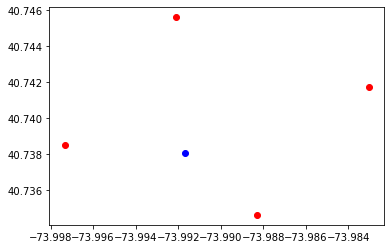

In [14]:
#testing with a single node
test_lon = nodes.loc[3]['x']
test_lat = nodes.loc[3]['y']
test_index, area_diff = locateInGrid(test_lon,test_lat,coord_df)
print("Node with longitude %f and latitude %f lies in gridspace %d"%(test_lon,test_lat,test_index))

grid_x = [ coord_df.loc[test_index]['x1'],
            coord_df.loc[test_index]['x2'],
            coord_df.loc[test_index]['x3'],
            coord_df.loc[test_index]['x4'] ]

grid_y = [ coord_df.loc[test_index]['y1'],
            coord_df.loc[test_index]['y2'],
            coord_df.loc[test_index]['y3'],
            coord_df.loc[test_index]['y4'] ]
plt.scatter(grid_x,grid_y,c='r')

plt.scatter(test_lon,test_lat,c='b')
plt.show()

Node with longitude -73.922039 and latitude 40.868465 lies in gridspace 70


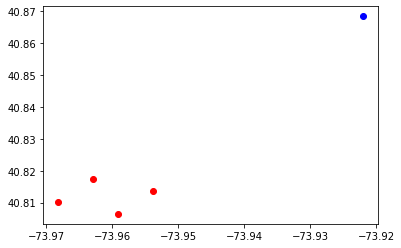

In [15]:
#example where the node is outside the prediction region
test_lon = nodes.loc[50]['x']
test_lat = nodes.loc[50]['y']
test_index, area_diff = locateInGrid(test_lon,test_lat,coord_df)
print("Node with longitude %f and latitude %f lies in gridspace %d"%(test_lon,test_lat,test_index))

grid_x = [ coord_df.loc[test_index]['x1'],
            coord_df.loc[test_index]['x2'],
            coord_df.loc[test_index]['x3'],
            coord_df.loc[test_index]['x4'] ]

grid_y = [ coord_df.loc[test_index]['y1'],
            coord_df.loc[test_index]['y2'],
            coord_df.loc[test_index]['y3'],
            coord_df.loc[test_index]['y4'] ]
plt.scatter(grid_x,grid_y,c='r')

plt.scatter(test_lon,test_lat,c='b')
plt.show()

In [16]:
# adding a column with the grid space ID in the nodes dataframe,
# by applying the function above to each row
nodes['grid_id'] = nodes.apply(lambda row: locateInGrid(row['x'],row['y'],coord_df)[0], axis=1)
nodes

,x,y,grid_id
id,,,
1,-73.978969,40.783390,50
2,-73.979568,40.783650,50
3,-73.991688,40.738045,27
4,-73.991019,40.737764,27
5,-73.931611,40.800105,73
...,...,...,...
12316,-73.986592,40.773109,45
12317,-73.913304,40.876437,70
12318,-73.973978,40.746062,33


# Haversine Function

In [17]:
#can take vectors for loc1 and loc2 (used to build a distance matrix)
#IMP: use (longitude,latitude) format for loc1 and loc2
def vectorized_haversine(loc1, loc2):
    earth_radius = 6371.0# use 3958.75 for miles

    locs_1 = np.deg2rad(loc1)
    locs_2 = np.deg2rad(loc2)

    lat_dif = (locs_1[:,1][:,None]/2 - locs_2[:,1]/2)
    lon_dif = (locs_1[:,0][:,None]/2 - locs_2[:,0]/2)

    np.sin(lat_dif, out=lat_dif)
    np.sin(lon_dif, out=lon_dif)

    np.power(lat_dif, 2, out=lat_dif)
    np.power(lon_dif, 2, out=lon_dif)

    lon_dif *= ( np.cos(locs_1[:,1])[:,None] * np.cos(locs_2[:,1]) )
    lon_dif += lat_dif

    np.arctan2(np.power(lon_dif,.5), np.power(1-lon_dif,.5), out = lon_dif)
    lon_dif *= ( 2 * earth_radius )

    return lon_dif

#uses single tuples as loc1 and loc2
def haversine(loc1,loc2):
    l1 = np.array([loc1])
    l2 = np.array([loc2])
    return vectorized_haversine(l1,l2)[0][0]

# Creating our own grid

Since Liu's work does not cover all of Manhattan, we need to create our own grid

In [18]:
def getGridDf(grid_map,upleft,upright,downleft,downright):
    co_map = []
    for i in range(grid_map[1] + 1):
        row = []
        for j in range(grid_map[0] + 1):
            xx, yy = getPoint(downleft, upleft, downright, grid_map, j, i)
            row.append((xx , yy))
        co_map.append(row)
    # print(co_map)

    list_index=[]
    list_coordinates=[]
    for i in range(1, grid_map[1] + 1):
        for j in range(1, grid_map[0] + 1):
            coord = [co_map[i-1][j-1], co_map[i][j-1],
                     co_map[i][j], co_map[i-1][j]]
            index = (j-1,i-1)
            list_coordinates.append(coord)
            list_index.append(index)
            
    coordinates_unpacked = [ [item for t in c for item in t] for c in list_coordinates ]
    coord_df = pd.DataFrame(coordinates_unpacked, columns=['x1','y1','x2','y2','x3','y3','x4','y4'])
    
    return coord_df

In [19]:
#starting out using the same values as Liu et al.
UPLEFT=    (-73.96297      , 40.81741)
UPRIGHT=   (-73.91764      , 40.79809)
DOWNLEFT=  (-74.041729755  , 40.71062942) 
DOWNRIGHT= (-73.9964       , 40.69131)
GRID_SIZE= (5,15)

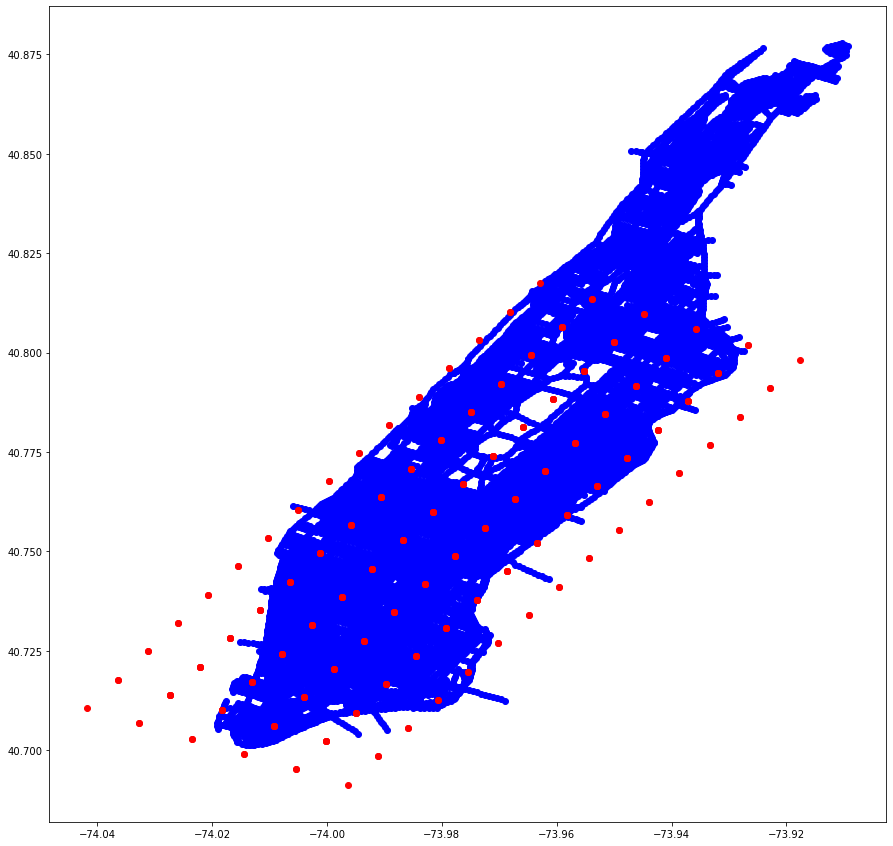

In [20]:
grid = getGridDf(grid_map = GRID_SIZE,
                 upleft = UPLEFT,
                 upright = UPRIGHT,
                 downleft = DOWNLEFT,
                 downright = DOWNRIGHT)
plt.figure(figsize=(15,15))
plt.scatter(nodes['x'],nodes['y'],c='b')
plt.scatter(grid['x1'],grid['y1'],c='r')
plt.scatter(grid['x2'],grid['y2'],c='r')
plt.scatter(grid['x3'],grid['y3'],c='r')
plt.scatter(grid['x4'],grid['y4'],c='r')
plt.show()

In [21]:
hav_ul_ur = haversine(UPLEFT,UPRIGHT)
hav_dl_dr = haversine(DOWNLEFT,DOWNRIGHT)
hav_ul_dl = haversine(UPLEFT,DOWNLEFT)
hav_ur_dr = haversine(UPRIGHT,DOWNRIGHT)

Haversine Distances  


|   From   |     To    | Distance (km) |
|:--------:|:---------:|:-------------:|
|  UPLEFT  |  UPRIGHT  |    {{hav_ul_ur}}  |
| DOWNLEFT | DOWNRIGHT |    {{hav_dl_dr}}    |
|    ---   |    ---    |      ---      |
|  UPLEFT  |  DOWNLEFT |    {{hav_ul_dl}}    |
|  UPRIGHT | DOWNRIGHT |    {{hav_ur_dr}}    |

If we consider up to 2 decimal places, the region is a rectangle with equal lengths and breadths

## Finding the top left corner

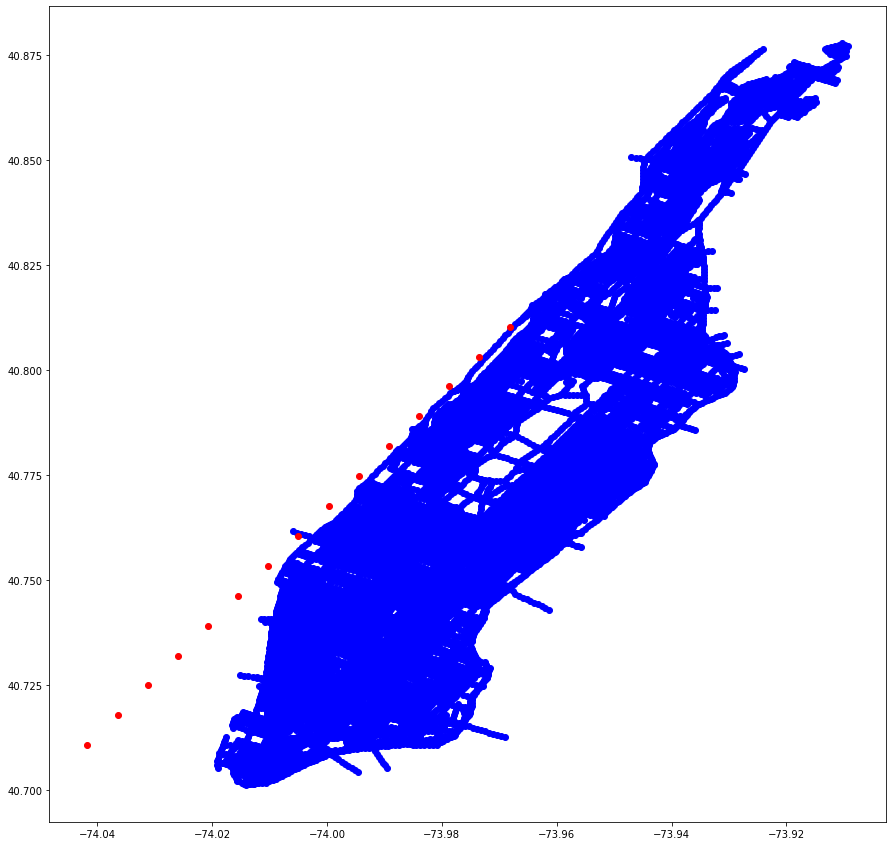

In [22]:
grid_subset = grid.loc[[i for i in grid.index if i%5==0]]
plt.figure(figsize=(15,15))
plt.scatter(nodes['x'],nodes['y'],c='b')
plt.scatter(grid_subset['x1'],grid_subset['y1'],c='r')
plt.show()

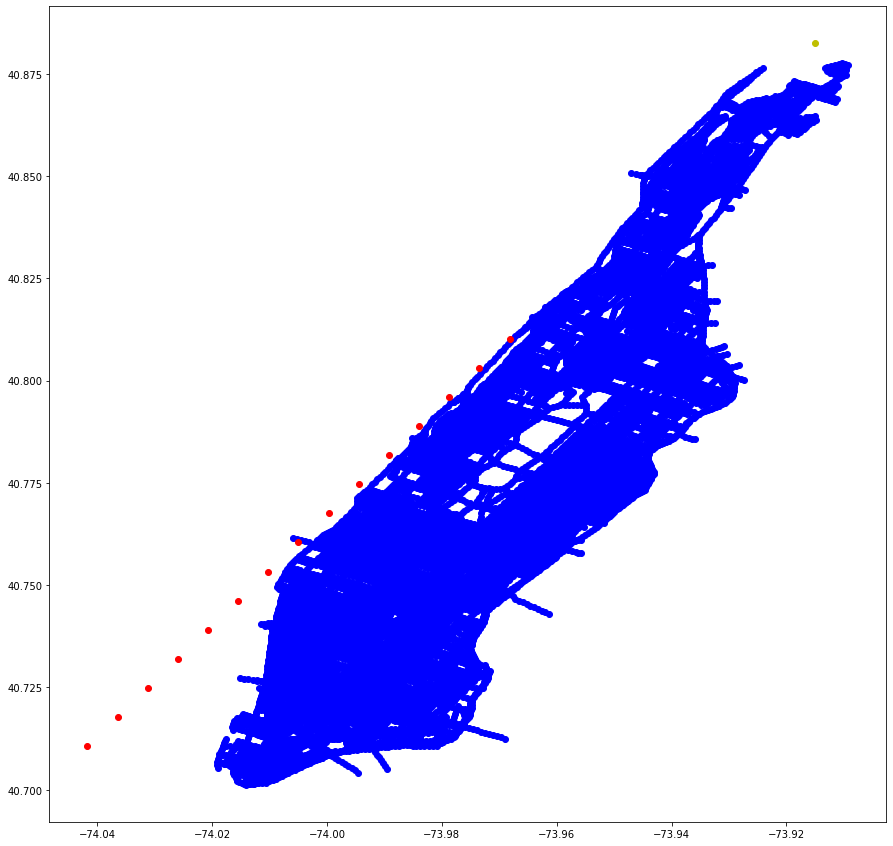

In [23]:
# if we extrapolate this line, we should be able to get TOPLEFT easily
m,c = np.polyfit(grid_subset['x1'],grid_subset['y1'],deg=1)
topleft_x = -73.915
topleft_y = (m * topleft_x) + c

plt.figure(figsize=(15,15))
plt.scatter(nodes['x'],nodes['y'],c='b')
plt.scatter(grid_subset['x1'],grid_subset['y1'],c='r')
plt.scatter(topleft_x,topleft_y,c='y')
plt.show()

In [24]:
UPLEFT_EXTENDED = (topleft_x,topleft_y)
print("bottom left corner: ",DOWNLEFT)
print("top left corner: ",UPLEFT_EXTENDED)
print("haversine distance: ",haversine(DOWNLEFT,UPLEFT_EXTENDED))

bottom left corner:  (-74.041729755, 40.71062942)
top left corner:  (-73.915, 40.88244657131234)
haversine distance:  21.881783778192997


## Finding the top right corner

to find the top right corner, we apply a similar approach, extrapolating the line until we approximately match the haversine distance

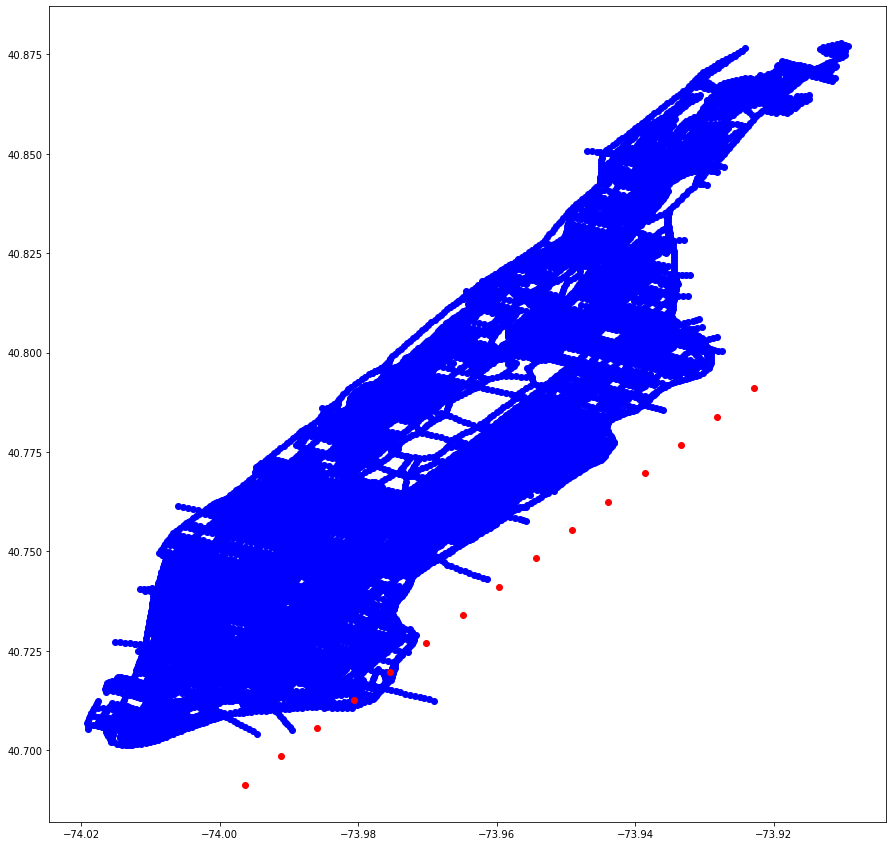

In [25]:
grid_subset = grid.loc[[i+4 for i in grid.index if i%5==0]]
plt.figure(figsize=(15,15))
plt.scatter(nodes['x'],nodes['y'],c='b')
plt.scatter(grid_subset['x4'],grid_subset['y4'],c='r')
plt.show()

In [26]:
m,c = np.polyfit(grid_subset['x4'],grid_subset['y4'],deg=1)
upright_x = -73.869679
upright_y = (m * upright_x) + c
UPRIGHT_EXTENDED = (upright_x,upright_y)
print("bottom right corner: ",DOWNRIGHT)
print("top right corner: ",UPRIGHT_EXTENDED)
print("haversine distance: ",haversine(DOWNRIGHT,UPRIGHT_EXTENDED))

bottom right corner:  (-73.9964, 40.69131)
top right corner:  (-73.869679, 40.863115281494075)
haversine distance:  21.88178587274206


by trial and error, we've found a point which makes the lengths of the rectangle equal up to 4 d.p

In [27]:
print("top left corner: ",UPLEFT_EXTENDED)
print("top right corner: ",UPRIGHT_EXTENDED)
print("haversine distance: ",haversine(UPLEFT_EXTENDED,UPRIGHT_EXTENDED))

top left corner:  (-73.915, 40.88244657131234)
top right corner:  (-73.869679, 40.863115281494075)
haversine distance:  4.375121732540083


The breadth of the rectangle, formed between the two new points we've generated, mathches the old breadth up to two d.p

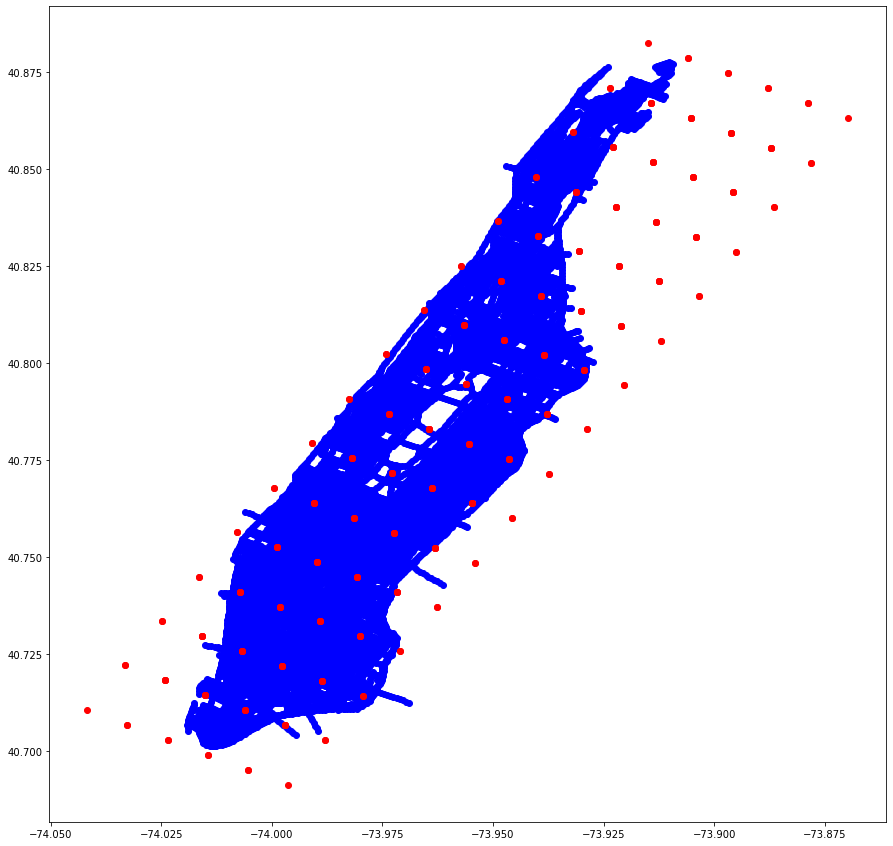

In [28]:
grid = getGridDf(grid_map = GRID_SIZE,
                 upleft = UPLEFT_EXTENDED,
                 upright = UPRIGHT_EXTENDED,
                 downleft = DOWNLEFT,
                 downright = DOWNRIGHT)
plt.figure(figsize=(15,15))
plt.scatter(nodes['x'],nodes['y'],c='b')
plt.scatter(grid['x1'],grid['y1'],c='r')
plt.scatter(grid['x2'],grid['y2'],c='r')
plt.scatter(grid['x3'],grid['y3'],c='r')
plt.scatter(grid['x4'],grid['y4'],c='r')
plt.show()

In [29]:
GRID_SIZE

(5, 15)

## Widening the prediction zone

In [30]:
grid_subset = grid.loc[range(len(grid)-5,len(grid))]
m,c = np.polyfit(grid_subset['x2'],grid_subset['y2'],deg=1)
upleft_x = -73.92
upleft_y = (m * upleft_x) + c
UPLEFT_NEW = (upleft_x,upleft_y)

#plt.figure(figsize=(15,15))
#plt.scatter(nodes['x'],nodes['y'],c='b')
#plt.scatter(grid_subset['x2'],grid_subset['y2'],c='r')
#plt.scatter(UPLEFT_NEW[0],UPLEFT_NEW[1],c='y')
#plt.show()

print("new width of entire region (upper):",haversine(UPLEFT_NEW,UPRIGHT_EXTENDED))

new width of entire region (upper): 4.857649882622571


In [31]:
grid_subset = grid.loc[range(5)]
m,c = np.polyfit(grid_subset['x4'],grid_subset['y4'],deg=1)
downleft_x = -74.04663
downleft_y = (m * downleft_x) + c
DOWNLEFT_NEW = (downleft_x,downleft_y)

#plt.figure(figsize=(15,15))
#plt.scatter(nodes['x'],nodes['y'],c='b')
#plt.scatter(grid_subset['x4'],grid_subset['y4'],c='r')
#plt.scatter(DOWNLEFT_NEW[0],DOWNLEFT_NEW[1],c='y')
#plt.show()

print("new width of entire region (LOWER):",haversine(DOWNLEFT_NEW,DOWNRIGHT))

new width of entire region (LOWER): 4.857550424478995


In [32]:
hav_ul_ur = haversine(UPLEFT_NEW,UPRIGHT_EXTENDED)
hav_dl_dr = haversine(DOWNLEFT_NEW,DOWNRIGHT)
hav_ul_dl = haversine(UPLEFT_NEW,DOWNLEFT_NEW)
hav_ur_dr = haversine(UPRIGHT_EXTENDED,DOWNRIGHT)

Haversine Distances  


|   From   |     To    | Distance (km) |
|:--------:|:---------:|:-------------:|
|  UPLEFT  |  UPRIGHT  |    {{hav_ul_ur}}  |
| DOWNLEFT | DOWNRIGHT |    {{hav_dl_dr}}    |
|    ---   |    ---    |      ---      |
|  UPLEFT  |  DOWNLEFT |    {{hav_ul_dl}}    |
|  UPRIGHT | DOWNRIGHT |    {{hav_ur_dr}}    |

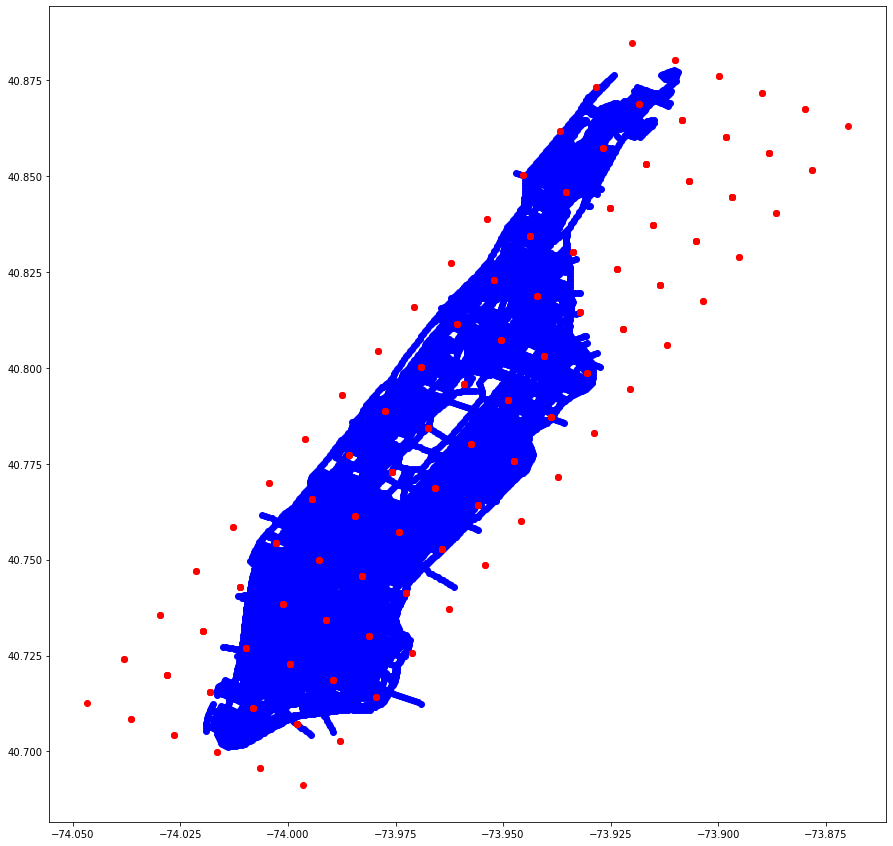

In [33]:
grid = getGridDf(grid_map = GRID_SIZE,
                 upleft = UPLEFT_NEW,
                 upright = UPRIGHT_EXTENDED,
                 downleft = DOWNLEFT_NEW,
                 downright = DOWNRIGHT)
plt.figure(figsize=(15,15))
plt.scatter(nodes['x'],nodes['y'],c='b')
plt.scatter(grid['x1'],grid['y1'],c='r')
plt.scatter(grid['x2'],grid['y2'],c='r')
plt.scatter(grid['x3'],grid['y3'],c='r')
plt.scatter(grid['x4'],grid['y4'],c='r')
plt.show()

## Fine-tuning the granularity

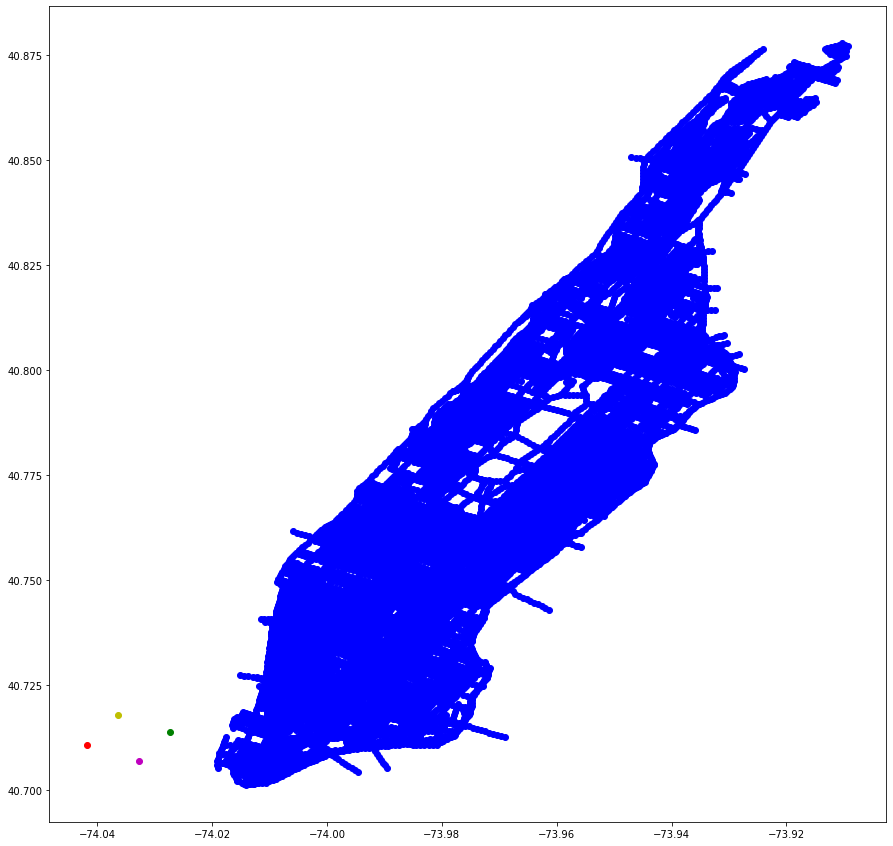

In [34]:
# we'll try to ensure that the ratio of height-to-width of each grid space
# is the same as it was in Liu et al.
grid_old = getGridDf(grid_map = GRID_SIZE,
                     upleft = UPLEFT,
                     upright = UPRIGHT,
                     downleft = DOWNLEFT,
                     downright = DOWNRIGHT)
# we'll get a sample gridspace
liu_gridspace = grid_old.loc[0]
plt.figure(figsize=(15,15))
plt.scatter(nodes['x'],nodes['y'],c='b')
plt.scatter(liu_gridspace['x1'],liu_gridspace['y1'],c='r')#bottom right
plt.scatter(liu_gridspace['x2'],liu_gridspace['y2'],c='y')#top left
plt.scatter(liu_gridspace['x3'],liu_gridspace['y3'],c='g')#top right
plt.scatter(liu_gridspace['x4'],liu_gridspace['y4'],c='m')#bottom right
plt.show()

In [35]:
width_up = haversine( liu_gridspace[['x2','y2']] , liu_gridspace[['x3','y3']] )
width_down = haversine( liu_gridspace[['x1','y1']] , liu_gridspace[['x4','y4']] )
width_avg = (width_up + width_down) / 2
print("UPLEFT -> UPRIGHT :   %f"%width_up)
print("DOWNLEFT -> DOWNRIGHT :   %f"%width_down)
print("average width :   %f"%width_avg)
print("---------------")
height_left = haversine( liu_gridspace[['x2','y2']] , liu_gridspace[['x1','y1']] )
height_right = haversine( liu_gridspace[['x3','y3']] , liu_gridspace[['x4','y4']] )
height_avg = (height_left + height_right) / 2
print("UPLEFT -> DOWNLEFT :   %f"%height_left)
print("UPRIGHT -> DOWNRIGHT :   %f"%height_right)
print("average height :   %f"%height_avg)
print("---------------")
print("height-to-width ratio :   %f"%(height_avg/width_avg))

UPLEFT -> UPRIGHT :   0.876595
DOWNLEFT -> DOWNRIGHT :   0.876666
average width :   0.876631
---------------
UPLEFT -> DOWNLEFT :   0.906871
UPRIGHT -> DOWNRIGHT :   0.906883
average height :   0.906877
---------------
height-to-width ratio :   1.034503


In [36]:
# repeating the same process to check the height and width
# of each gridspace with the new configuration
grid_new = getGridDf(grid_map = GRID_SIZE,
                     upleft = UPLEFT_NEW,
                     upright = UPRIGHT_EXTENDED,
                     downleft = DOWNLEFT_NEW,
                     downright = DOWNRIGHT)
new_gridspace = grid_new.loc[0]

width_up = haversine( new_gridspace[['x2','y2']] , new_gridspace[['x3','y3']] )
width_down = haversine( new_gridspace[['x1','y1']] , new_gridspace[['x4','y4']] )
width_avg = (width_up + width_down) / 2
print("UPLEFT -> UPRIGHT :   %f"%width_up)
print("DOWNLEFT -> DOWNRIGHT :   %f"%width_down)
print("average width :   %f"%width_avg)
print("---------------")
height_left = haversine( new_gridspace[['x2','y2']] , new_gridspace[['x1','y1']] )
height_right = haversine( new_gridspace[['x3','y3']] , new_gridspace[['x4','y4']] )
height_avg = (height_left + height_right) / 2
print("UPLEFT -> DOWNLEFT :   %f"%height_left)
print("UPRIGHT -> DOWNRIGHT :   %f"%height_right)
print("average height :   %f"%height_avg)
print("---------------")
print("height-to-width ratio :   %f"%(height_avg/width_avg))

UPLEFT -> UPRIGHT :   0.971288
DOWNLEFT -> DOWNRIGHT :   0.971415
average width :   0.971352
---------------
UPLEFT -> DOWNLEFT :   1.459196
UPRIGHT -> DOWNRIGHT :   1.459218
average height :   1.459207
---------------
height-to-width ratio :   1.502243


the dimensions of each gridspave have clearly not been preserved so we should try out a new grid layout

In [37]:
grid_new = getGridDf(grid_map = (5,20),
                     upleft = UPLEFT_NEW,
                     upright = UPRIGHT_EXTENDED,
                     downleft = DOWNLEFT_NEW,
                     downright = DOWNRIGHT)
new_gridspace = grid_new.loc[0]

width_up = haversine( new_gridspace[['x2','y2']] , new_gridspace[['x3','y3']] )
width_down = haversine( new_gridspace[['x1','y1']] , new_gridspace[['x4','y4']] )
width_avg = (width_up + width_down) / 2
print("UPLEFT -> UPRIGHT :   %f"%width_up)
print("DOWNLEFT -> DOWNRIGHT :   %f"%width_down)
print("average width :   %f"%width_avg)
print("---------------")
height_left = haversine( new_gridspace[['x2','y2']] , new_gridspace[['x1','y1']] )
height_right = haversine( new_gridspace[['x3','y3']] , new_gridspace[['x4','y4']] )
height_avg = (height_left + height_right) / 2
print("UPLEFT -> DOWNLEFT :   %f"%height_left)
print("UPRIGHT -> DOWNRIGHT :   %f"%height_right)
print("average height :   %f"%height_avg)
print("---------------")
print("height-to-width ratio :   %f"%(height_avg/width_avg))

UPLEFT -> UPRIGHT :   0.971320
DOWNLEFT -> DOWNRIGHT :   0.971415
average width :   0.971368
---------------
UPLEFT -> DOWNLEFT :   1.094402
UPRIGHT -> DOWNRIGHT :   1.094419
average height :   1.094411
---------------
height-to-width ratio :   1.126670


In [38]:
#the ratio is much better, whilst still being a straighforward layout, so we keep it
GRID_SIZE_NEW=(5,20)

## Final Parameter List

In [39]:
print("Top Left Corner: ",UPLEFT_NEW)
print("Top Right Corner: ",UPRIGHT_EXTENDED)
print("Bottom Left Corner: ",DOWNLEFT_NEW)
print("Bottom Right Corner: ",DOWNRIGHT)
print("Grid Size: ",GRID_SIZE_NEW)

Top Left Corner:  (-73.92, 40.88457755790161)
Top Right Corner:  (-73.869679, 40.863115281494075)
Bottom Left Corner:  (-74.04663, 40.7127178912758)
Bottom Right Corner:  (-73.9964, 40.69131)
Grid Size:  (5, 20)


# Re-mapping the network nodes to demand model regions

In [40]:
grid_final = getGridDf(grid_map = (5,20),
                     upleft = UPLEFT_NEW,
                     upright = UPRIGHT_EXTENDED,
                     downleft = DOWNLEFT_NEW,
                     downright = DOWNRIGHT)

grid_final['a1'] = np.sqrt( (grid_final['x1']-grid_final['x2'])**2 + (grid_final['y1']-grid_final['y2'])**2 )
grid_final['a2'] = np.sqrt( (grid_final['x2']-grid_final['x3'])**2 + (grid_final['y2']-grid_final['y3'])**2 )
grid_final['a3'] = np.sqrt( (grid_final['x3']-grid_final['x4'])**2 + (grid_final['y3']-grid_final['y4'])**2 )
grid_final['a4'] = np.sqrt( (grid_final['x4']-grid_final['x1'])**2 + (grid_final['y4']-grid_final['y1'])**2 )
grid_final['A_true'] = grid_final['a1'] * grid_final['a2']

Node with longitude -73.922039 and latitude 40.868465 lies in gridspace 90


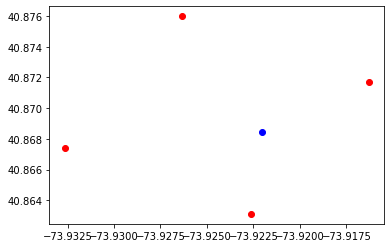

In [41]:
#example where the node was previously outside the prediction region
test_lon = nodes.loc[50]['x']
test_lat = nodes.loc[50]['y']
test_index, area_diff = locateInGrid(test_lon,test_lat,grid_final)
print("Node with longitude %f and latitude %f lies in gridspace %d"%(test_lon,test_lat,test_index))

grid_x = [ grid_final.loc[test_index]['x1'],
            grid_final.loc[test_index]['x2'],
            grid_final.loc[test_index]['x3'],
            grid_final.loc[test_index]['x4'] ]

grid_y = [ grid_final.loc[test_index]['y1'],
            grid_final.loc[test_index]['y2'],
            grid_final.loc[test_index]['y3'],
            grid_final.loc[test_index]['y4'] ]
plt.scatter(grid_x,grid_y,c='r')

plt.scatter(test_lon,test_lat,c='b')
plt.show()

In [42]:
nodes['grid_id'] = nodes.apply(lambda row: locateInGrid(row['x'],row['y'],grid_final)[0], axis=1)
nodes

,x,y,grid_id
id,,,
1,-73.978969,40.783390,41
2,-73.979568,40.783650,41
3,-73.991688,40.738045,22
4,-73.991019,40.737764,22
5,-73.931611,40.800105,63
...,...,...,...
12316,-73.986592,40.773109,36
12317,-73.913304,40.876437,95
12318,-73.973978,40.746062,28


In [46]:
mapping = nodes['grid_id']
mapping

id
1        41
2        41
3        22
4        22
5        63
         ..
12316    36
12317    95
12318    28
12319    57
12320    72
Name: grid_id, Length: 12320, dtype: int64

In [50]:
mapping.to_csv('node_grid_map_5x20.csv',
              index=True,
              index_label="node_id",
              header=["grid_id"])